In [11]:
import os
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

recipes_2 = nx.read_gml("recipe_graph_2_common_ingredients.gml")
recipes_5 = nx.read_gml("recipe_graph_5_common_ingredients.gml")

## What are the most versatile or influential recipes based on their graph connectivity?

In [12]:
def compute_centralities(graph):
    degree_centrality = nx.degree_centrality(graph)
    betweenness_centrality = nx.betweenness_centrality(graph)
    closeness_centrality = nx.closeness_centrality(graph)
    eigenvector_centrality = nx.eigenvector_centrality(graph)
    
    return {
        'degree': degree_centrality,
        'betweenness': betweenness_centrality,
        'closeness': closeness_centrality,
        'eigenvector': eigenvector_centrality
    }

def get_top_recipes(graph, centralities, centrality_type='degree', top_n=10):
    if centrality_type not in centralities:
        raise ValueError("Invalid centrality type. Choose from ['degree', 'betweenness', 'closeness', 'eigenvector']")
    
    sorted_centralities = sorted(centralities[centrality_type].items(), key=lambda x: x[1], reverse=True)
    sorted_centralities = [(graph.nodes[node]['name'], centrality) for node, centrality in sorted_centralities]
    return sorted_centralities[:top_n] 


from collections import Counter

def get_top_recipes_by_frequency(graph, centralities, top_n=5):
    all_top_recipes = []
    
    for centrality_type in ['degree', 'betweenness', 'closeness', 'eigenvector']:
        top_recipes = get_top_recipes(graph, centralities, centrality_type=centrality_type, top_n=top_n)
        all_top_recipes.extend([recipe[0] for recipe in top_recipes]) 
    
    recipe_counts = Counter(all_top_recipes)
    
    top_recipes_by_frequency = recipe_counts.most_common(top_n)
    
    return top_recipes_by_frequency



In [14]:
def centralities_info(graph, graph_name):
    
    centralities = compute_centralities(graph)
    print(f"Centralities for {graph_name}: {centralities}")

    top_recipes_by_frequency = get_top_recipes_by_frequency(graph, centralities, top_n=5)
    print(f"Top Recipes by Frequency across Centralities in {graph_name}:")
    for recipe, count in top_recipes_by_frequency:
        print(f"{recipe}: {count} times")
    

In [15]:
centralities_info(recipes_2, "Recipe network with min. 2 common ingredients")

Centralities for Recipe network with min. 2 common ingredients: {'degree': {'137739': 0.13827655310621242, '31490': 0.06412825651302605, '112140': 0.1503006012024048, '59389': 0.14629258517034066, '44061': 0.18837675350701402, '5289': 0.002004008016032064, '25274': 0.01002004008016032, '67888': 0.22044088176352702, '70971': 0.002004008016032064, '75452': 0.1903807615230461, '109439': 0.0, '42198': 0.09819639278557113, '67547': 0.2545090180360721, '107517': 0.05611222444889779, '39959': 0.0, '63986': 0.1442885771543086, '43026': 0.0060120240480961915, '23933': 0.0, '8559': 0.05410821643286573, '23850': 0.1062124248496994, '76808': 0.10821643286573146, '24701': 0.16633266533066132, '83873': 0.0721442885771543, '107699': 0.30260521042084165, '49262': 0.11222444889779558, '48156': 0.0060120240480961915, '54272': 0.17434869739478956, '47366': 0.19639278557114226, '37073': 0.0, '44123': 0.1222444889779559, '27087': 0.2685370741482966, '59952': 0.19639278557114226, '93249': 0.0040080160320641

In [16]:
centralities_info(recipes_5, "Recipe network with min. 5 common ingredients")

Centralities for Recipe network with min. 5 common ingredients: {'degree': {'137739': 0.0, '31490': 0.0, '112140': 0.002004008016032064, '59389': 0.0, '44061': 0.0, '5289': 0.0, '25274': 0.0, '67888': 0.0, '70971': 0.0, '75452': 0.0060120240480961915, '109439': 0.0, '42198': 0.0, '67547': 0.004008016032064128, '107517': 0.0, '39959': 0.0, '63986': 0.0, '43026': 0.0, '23933': 0.0, '8559': 0.0, '23850': 0.0, '76808': 0.0, '24701': 0.0, '83873': 0.002004008016032064, '107699': 0.03206412825651302, '49262': 0.0, '48156': 0.0, '54272': 0.004008016032064128, '47366': 0.002004008016032064, '37073': 0.0, '44123': 0.002004008016032064, '27087': 0.038076152304609215, '59952': 0.002004008016032064, '93249': 0.0, '54100': 0.0, '67664': 0.0, '87098': 0.0, '25775': 0.0, '33165': 0.0, '38798': 0.0, '22123': 0.0, '90921': 0.0, '93959': 0.08617234468937875, '93958': 0.022044088176352703, '58224': 0.0, '33606': 0.0, '94710': 0.0, '35173': 0.0, '83025': 0.05410821643286573, '52804': 0.002004008016032064,

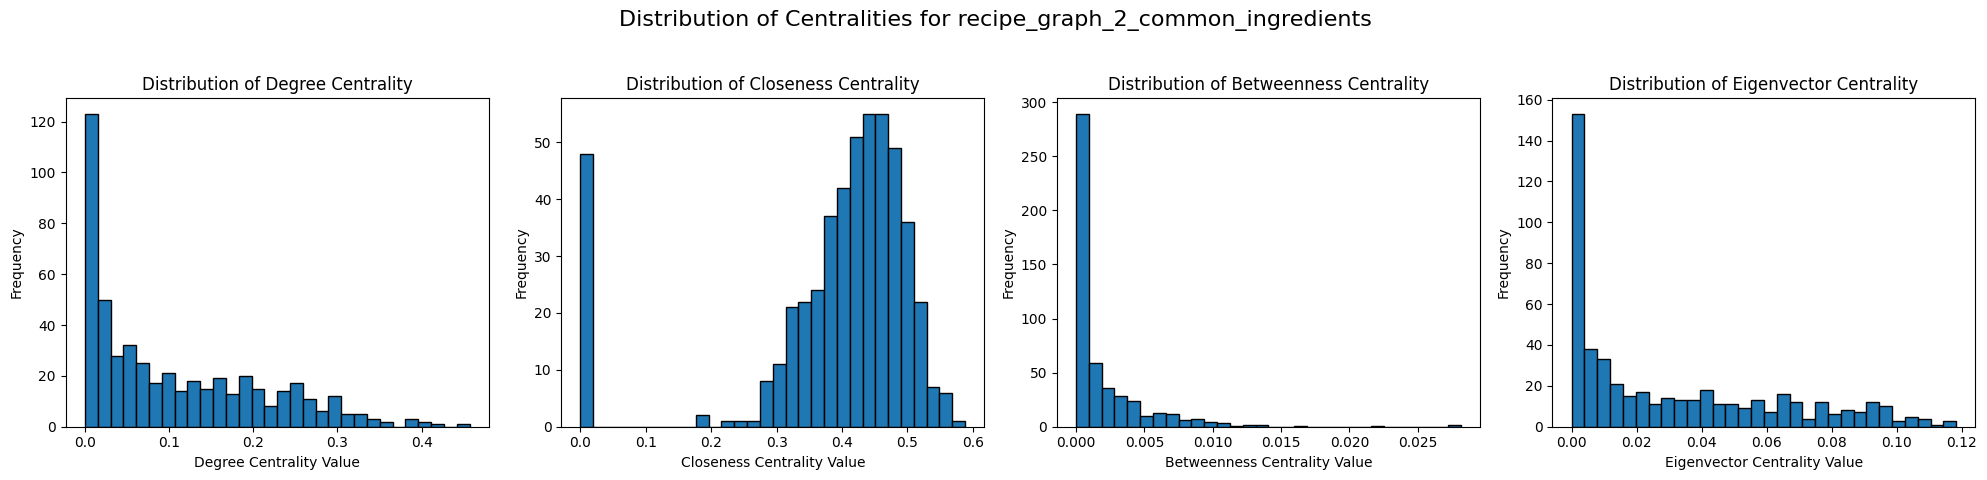

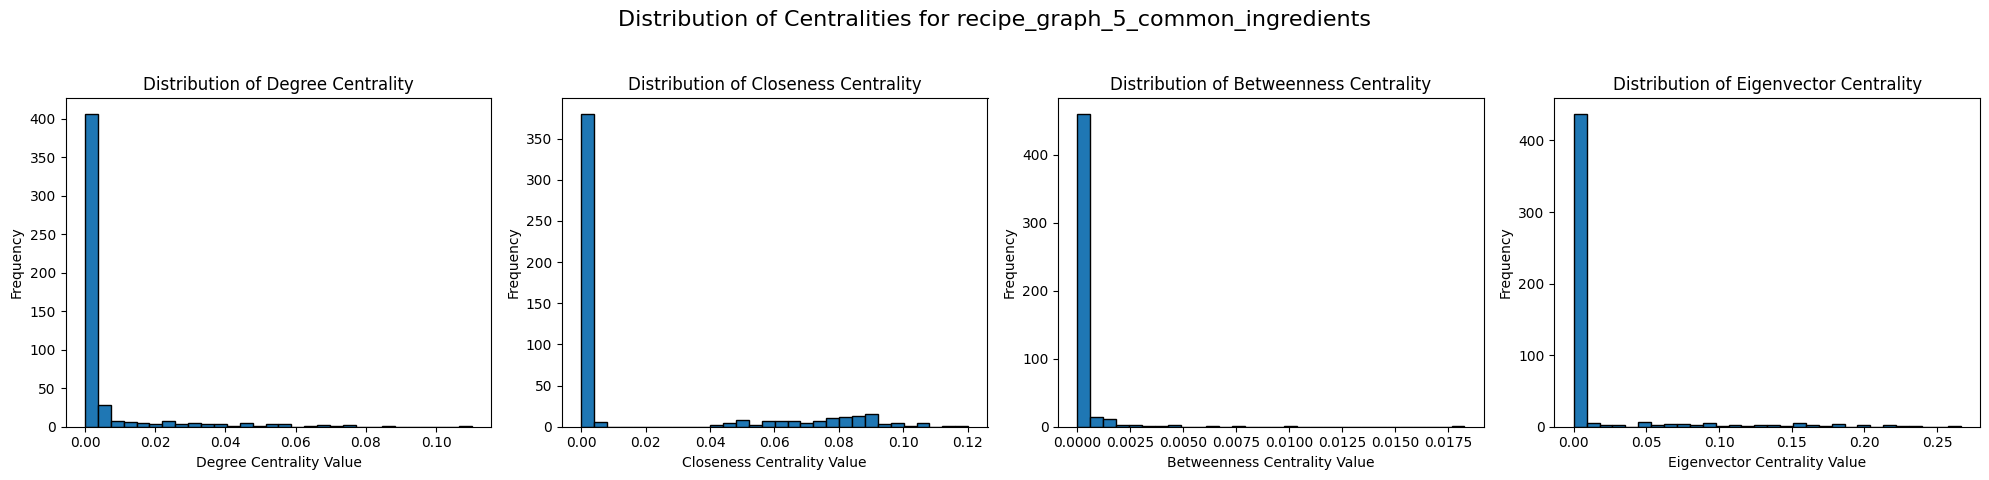

In [ ]:
def plot_centrality_distributions(df, graph_name):
    centrality_types = ['degree', 'closeness', 'betweenness', 'eigenvector']
    titles = [
        'Degree Centrality',
        'Closeness Centrality',
        'Betweenness Centrality',
        'Eigenvector Centrality'
    ]

    # Create subplots
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    for ax, centrality_type, title in zip(axes, centrality_types, titles):
        ax.hist(df[centrality_type], bins=30, edgecolor='black')
        ax.set_title(f'Distribution of {title}')
        ax.set_xlabel(f'{title} Value')
        ax.set_ylabel('Frequency')

    plt.suptitle(f'Distribution of Centralities for {graph_name}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
    plt.show()
    


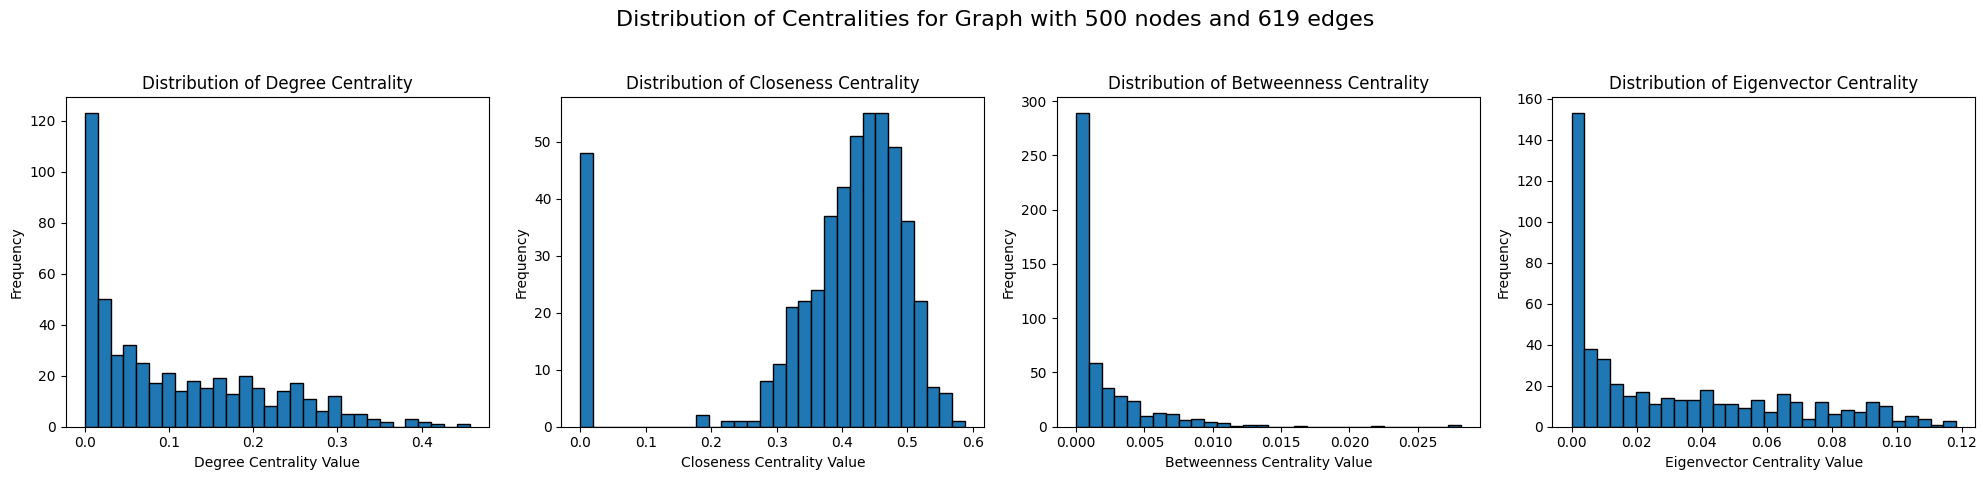

In [18]:
centralities = compute_centralities(recipes_2)
df = pd.DataFrame(centralities)
plot_centrality_distributions(df, recipes_5)

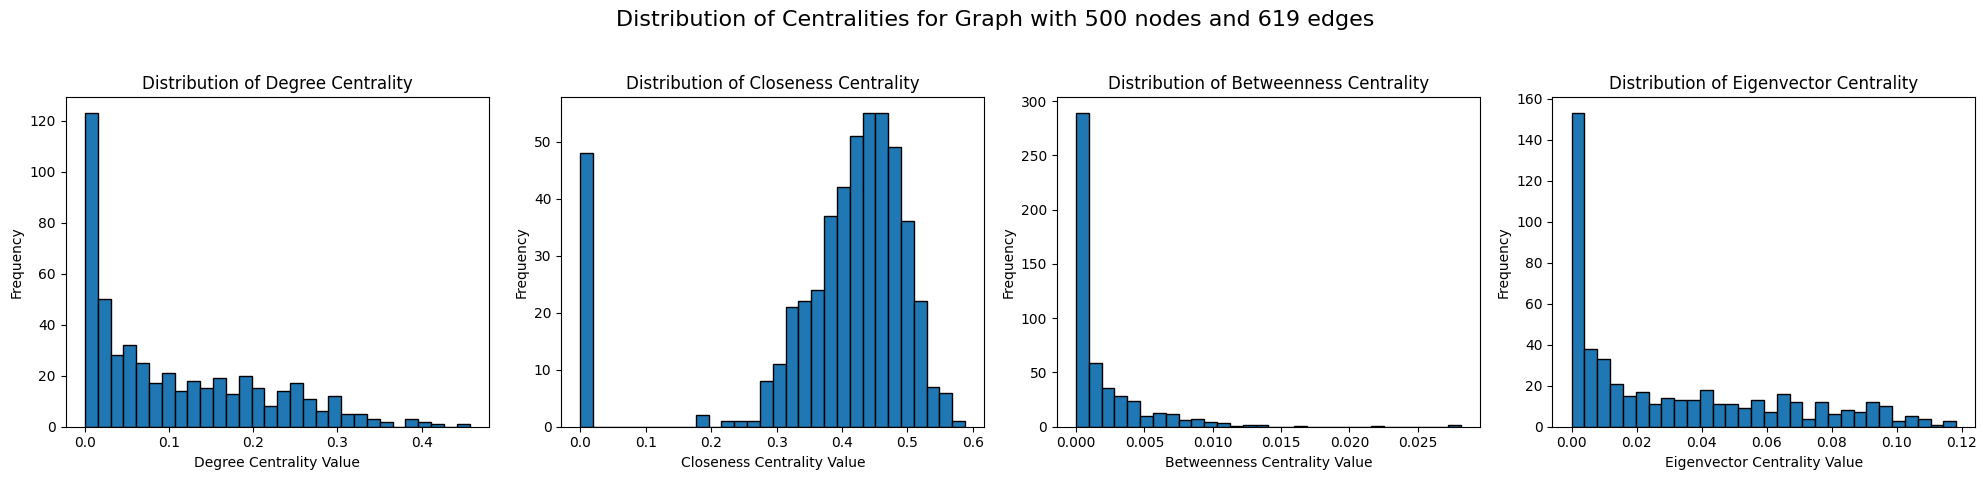

In [17]:
centralities = compute_centralities(recipes_2)
df = pd.DataFrame(centralities)
plot_centrality_distributions(df, recipes_5)

## Extra calculations

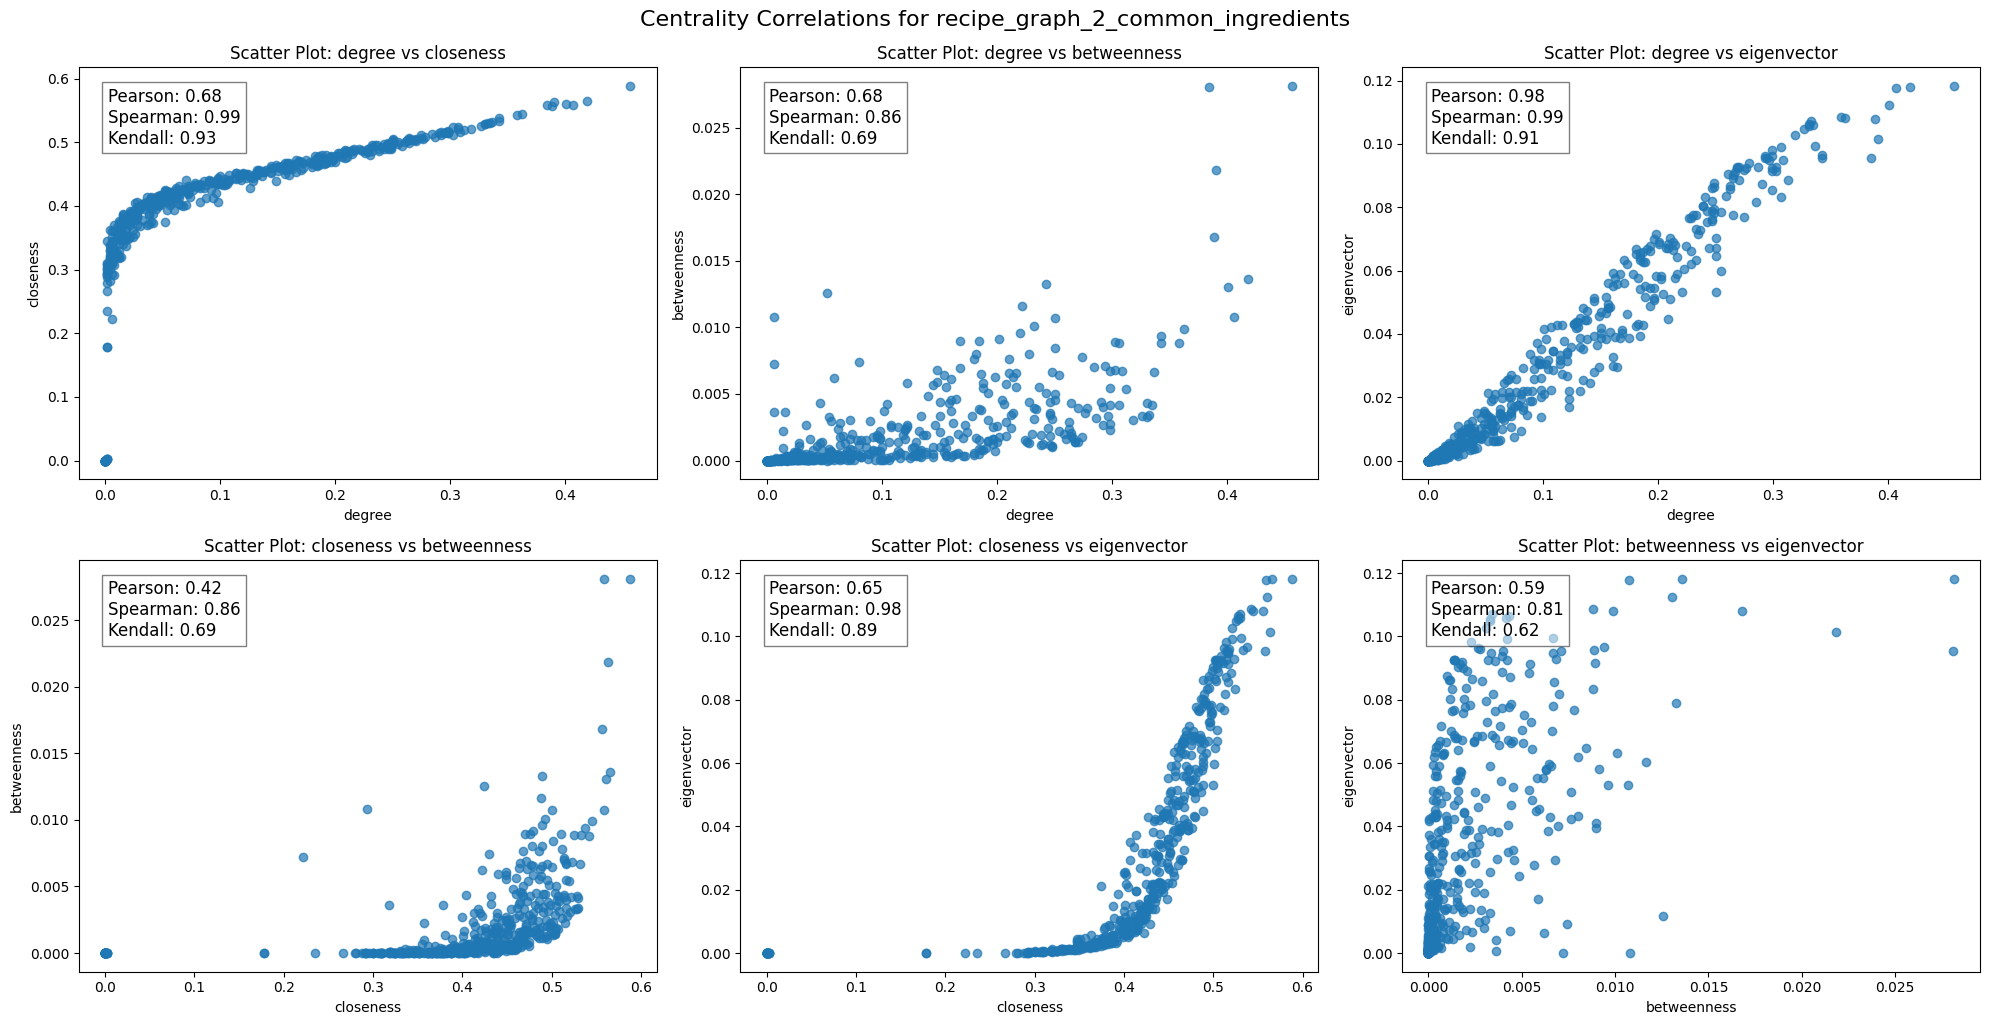

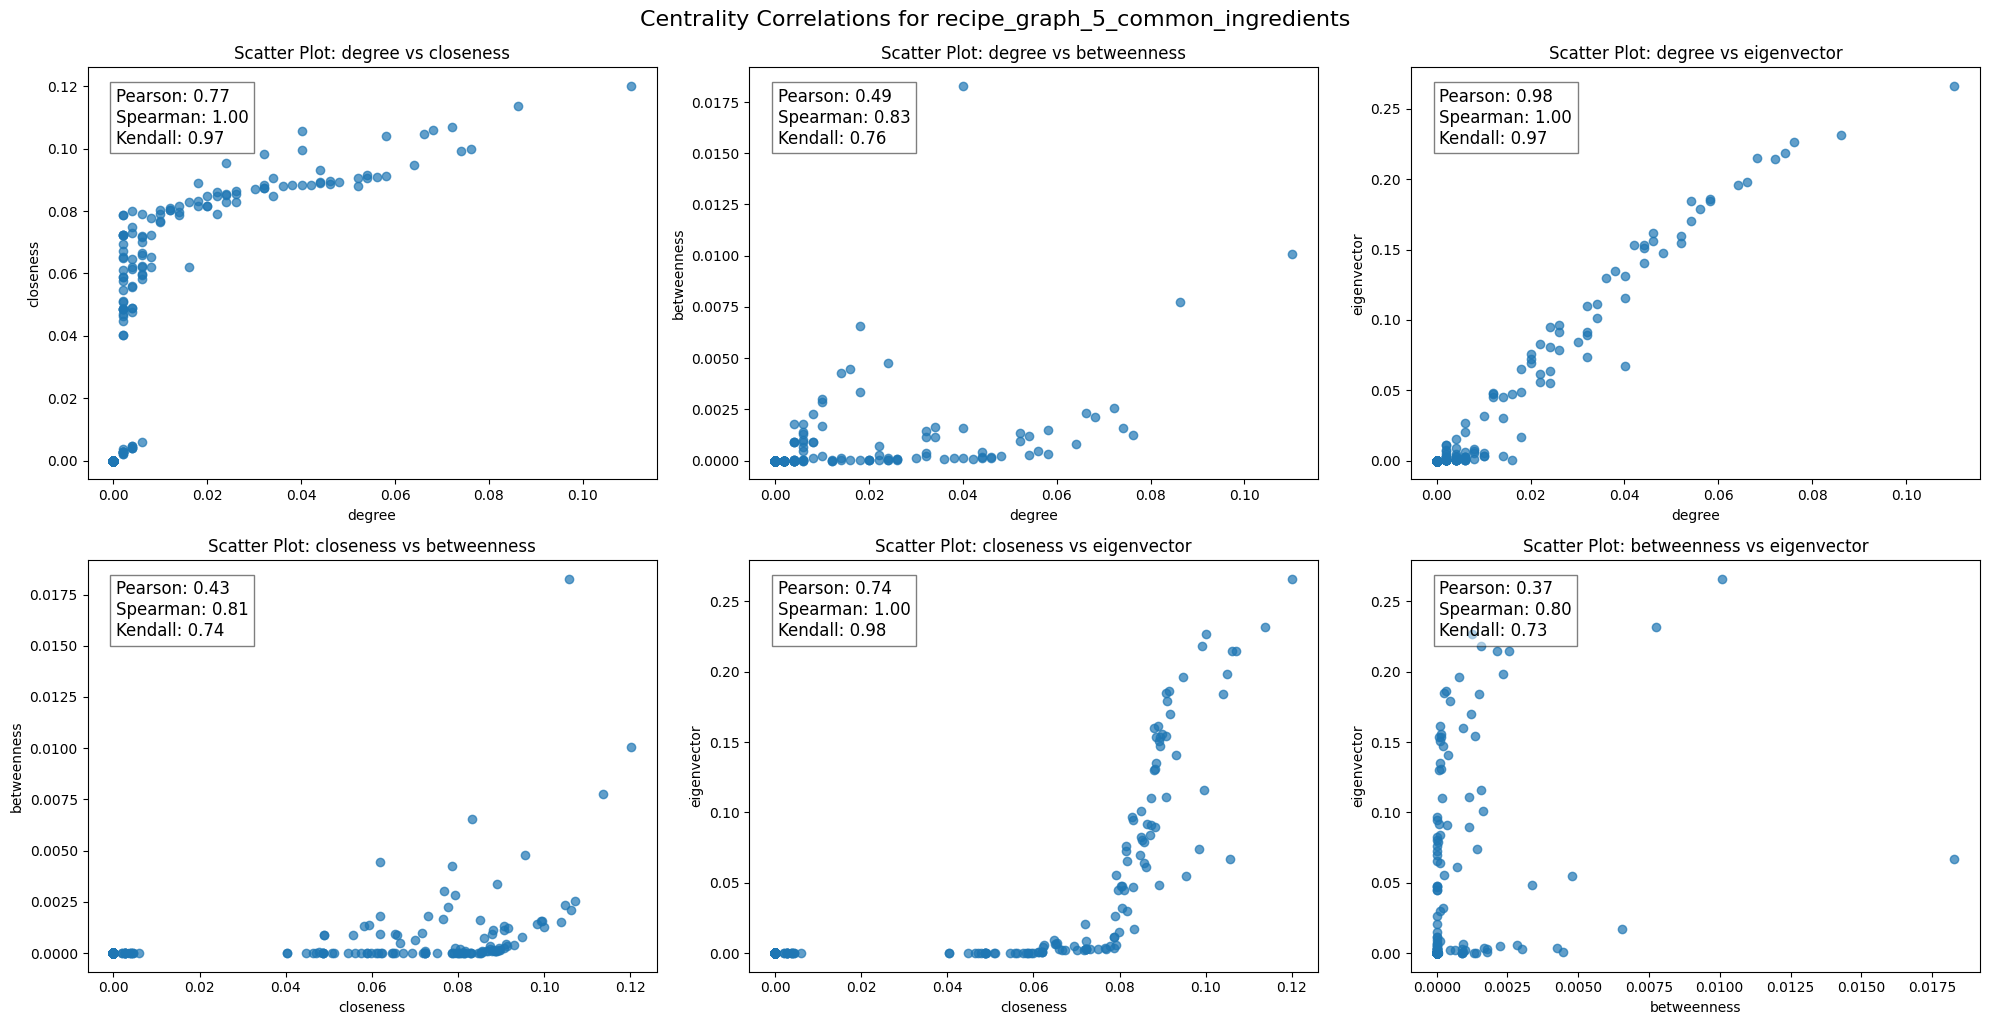

In [ ]:
from scipy.stats import pearsonr, spearmanr, kendalltau


def compute_correlation(df, col1, col2):
    pearson_corr, _ = pearsonr(df[col1], df[col2])
    spearman_corr, _ = spearmanr(df[col1], df[col2])
    kendall_corr, _ = kendalltau(df[col1], df[col2])
    return pearson_corr, spearman_corr, kendall_corr

def plot_centrality_scatter_plots(df, graph_name):
    centrality_columns = [
        'degree',
        'closeness',
        'betweenness',
        'eigenvector'
    ]
    
    # We created a grid for the scatter plots
    fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    axes = axes.flatten()  
    
    plot_index = 0
    for i in range(len(centrality_columns)):
        for j in range(i + 1, len(centrality_columns)):
            col1 = centrality_columns[i]
            col2 = centrality_columns[j]
            
            # Compute correlations
            pearson_corr, spearman_corr, kendall_corr = compute_correlation(df, col1, col2)
            
            # Scatter plot using matplotlib
            axes[plot_index].scatter(df[col1], df[col2], alpha=0.7)
            axes[plot_index].set_title(f'Scatter Plot: {col1} vs {col2}')
            axes[plot_index].set_xlabel(col1)
            axes[plot_index].set_ylabel(col2)
            
            # Annotate correlation coefficients
            axes[plot_index].text(0.05, 0.95, f'Pearson: {pearson_corr:.2f}\nSpearman: {spearman_corr:.2f}\nKendall: {kendall_corr:.2f}', 
                                   transform=axes[plot_index].transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
            
            plot_index += 1

    plt.tight_layout()
    plt.suptitle(f'Centrality Correlations for {graph_name}', fontsize=16, y=1.02)
    plt.show()


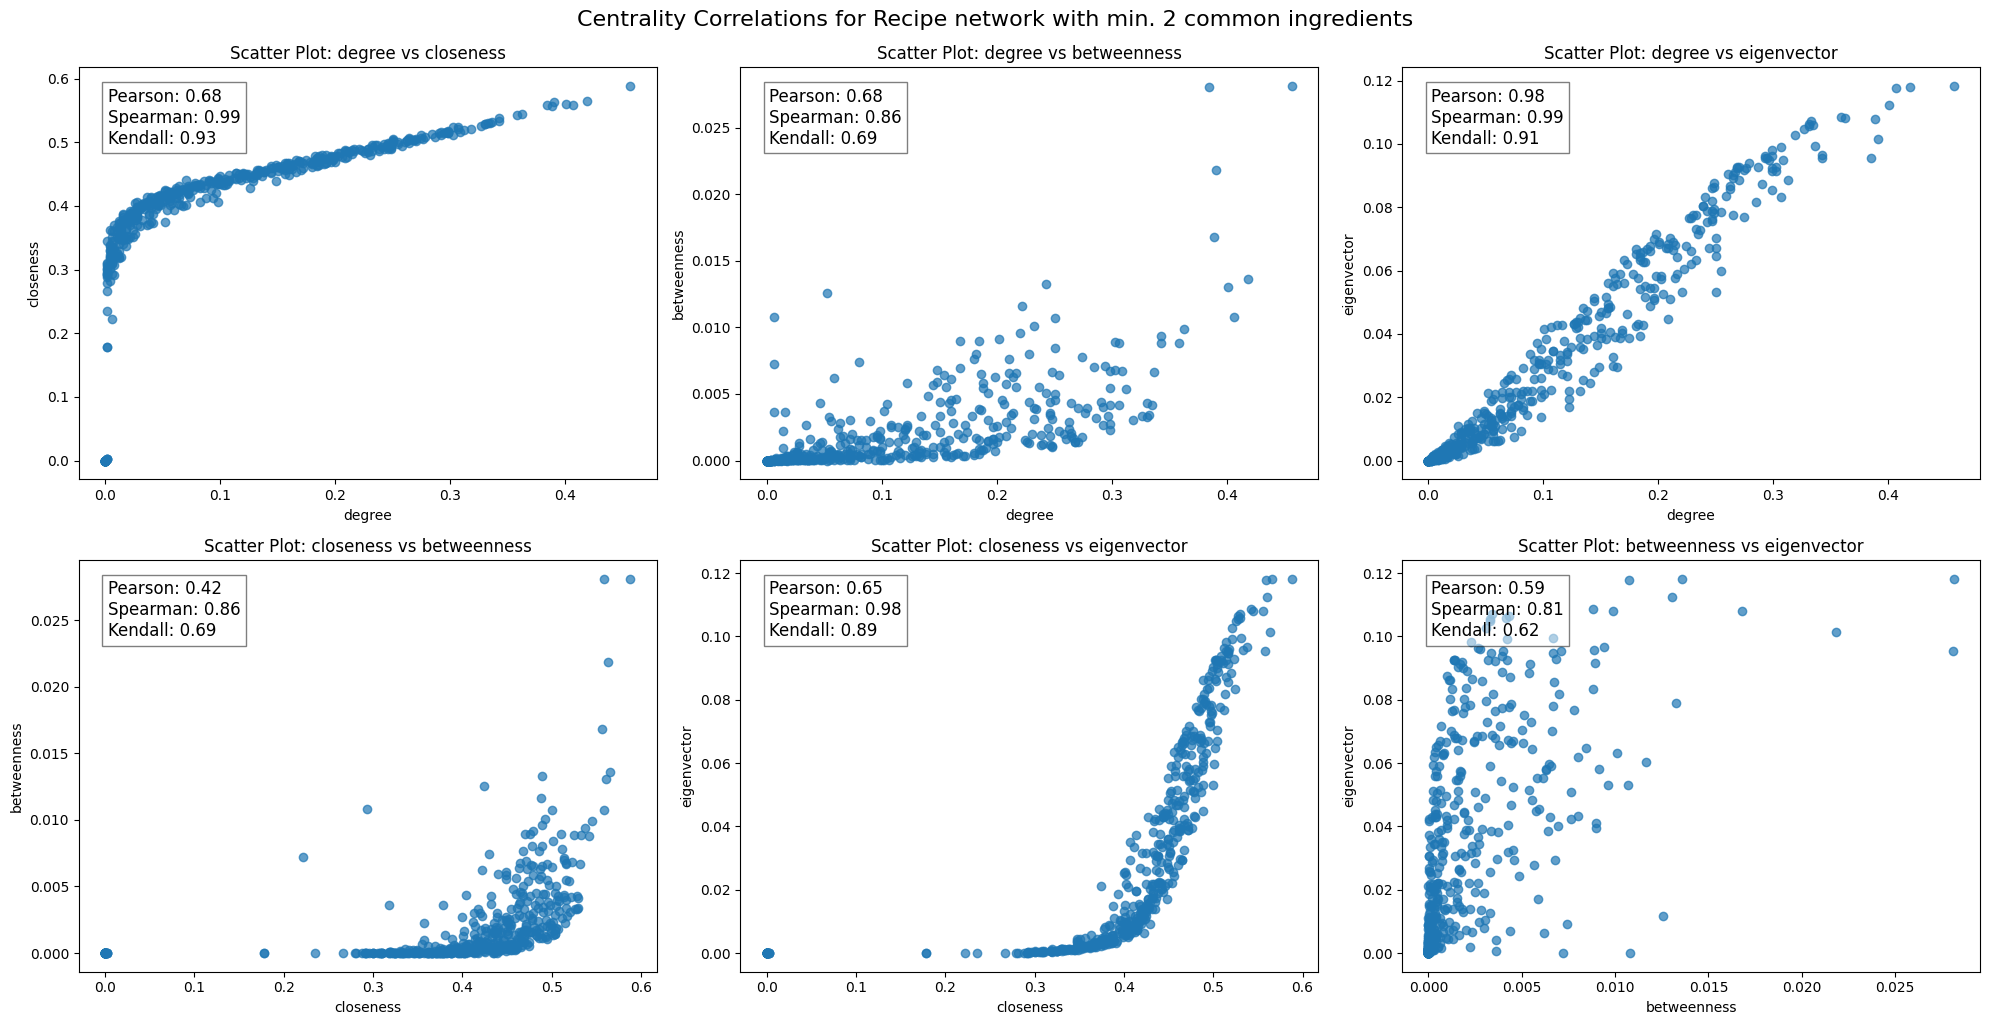

In [19]:
centralities = compute_centralities(recipes_2)
df = pd.DataFrame(centralities)
plot_centrality_scatter_plots(df, "Recipe network with min. 2 common ingredients")

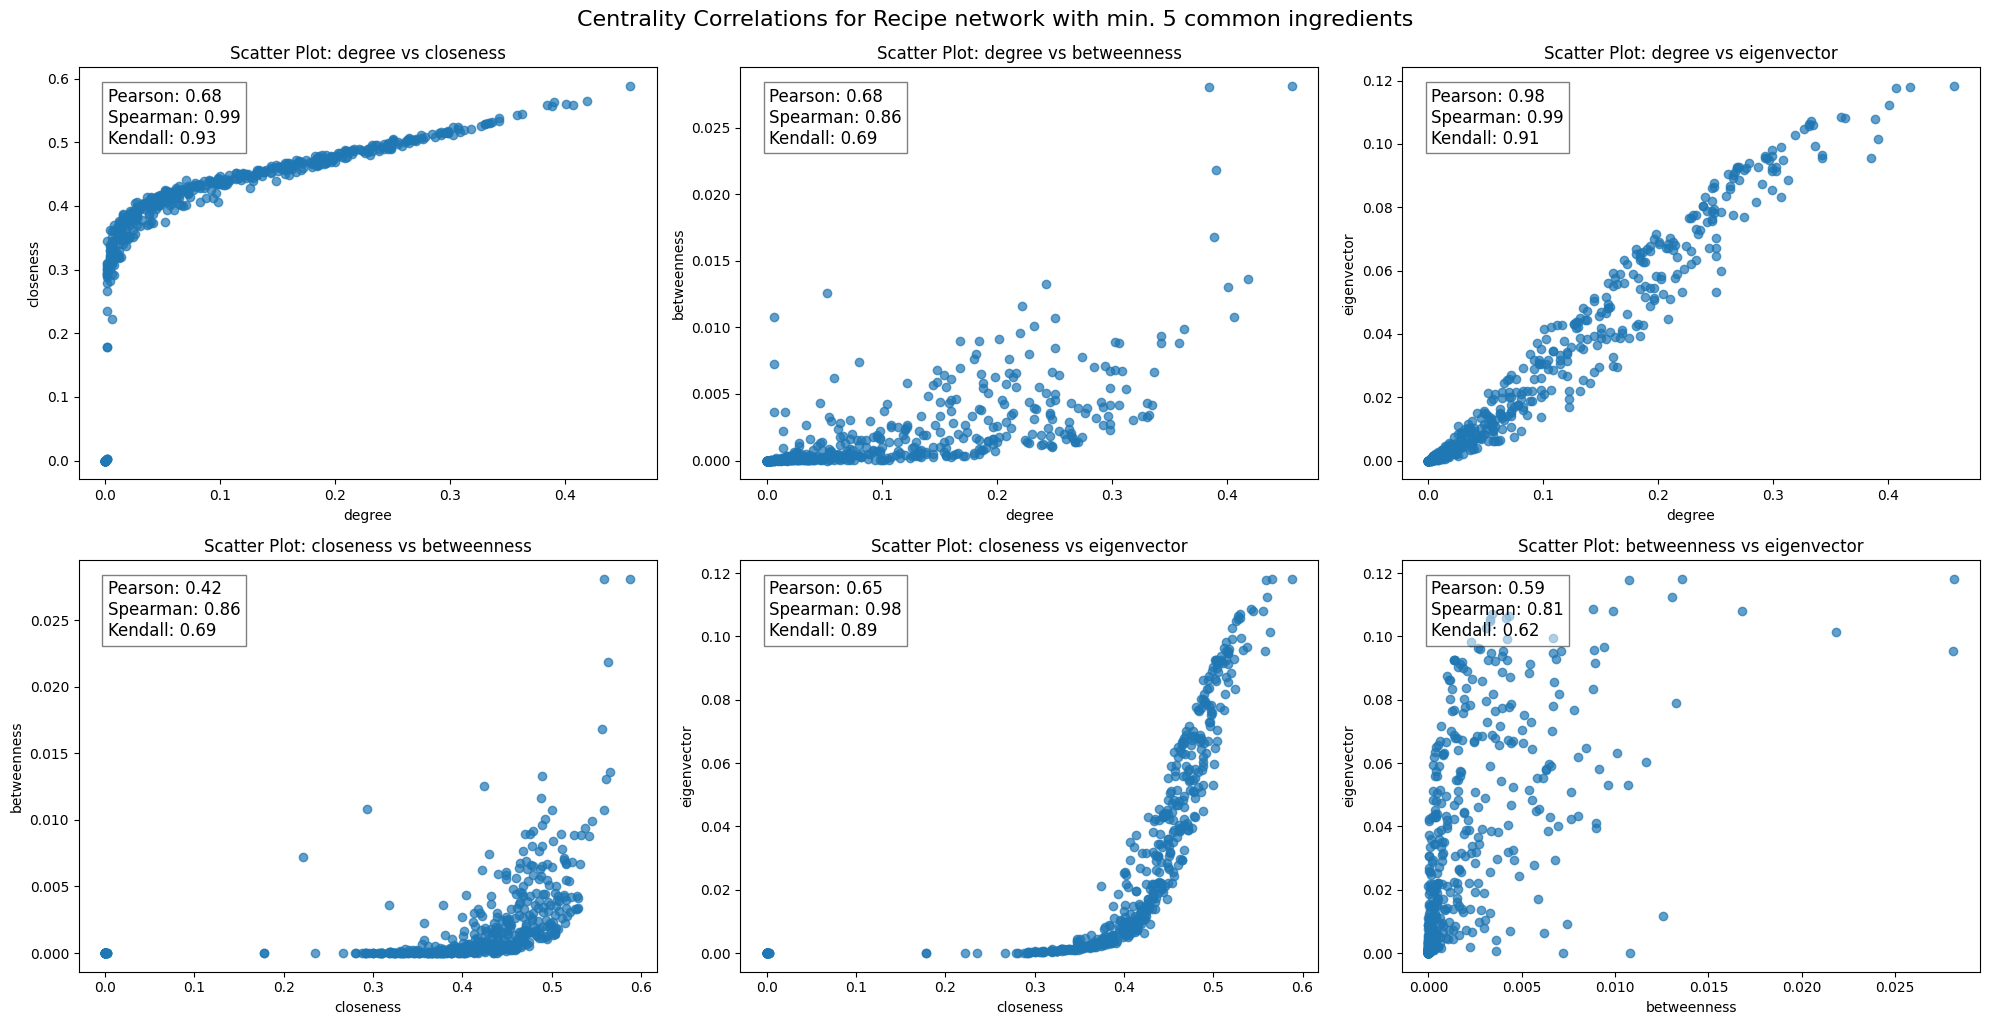

In [ ]:
centralities = compute_centralities(recipes_2)
df = pd.DataFrame(centralities)
plot_centrality_scatter_plots(df, "Recipe network with min. 5 common ingredients")

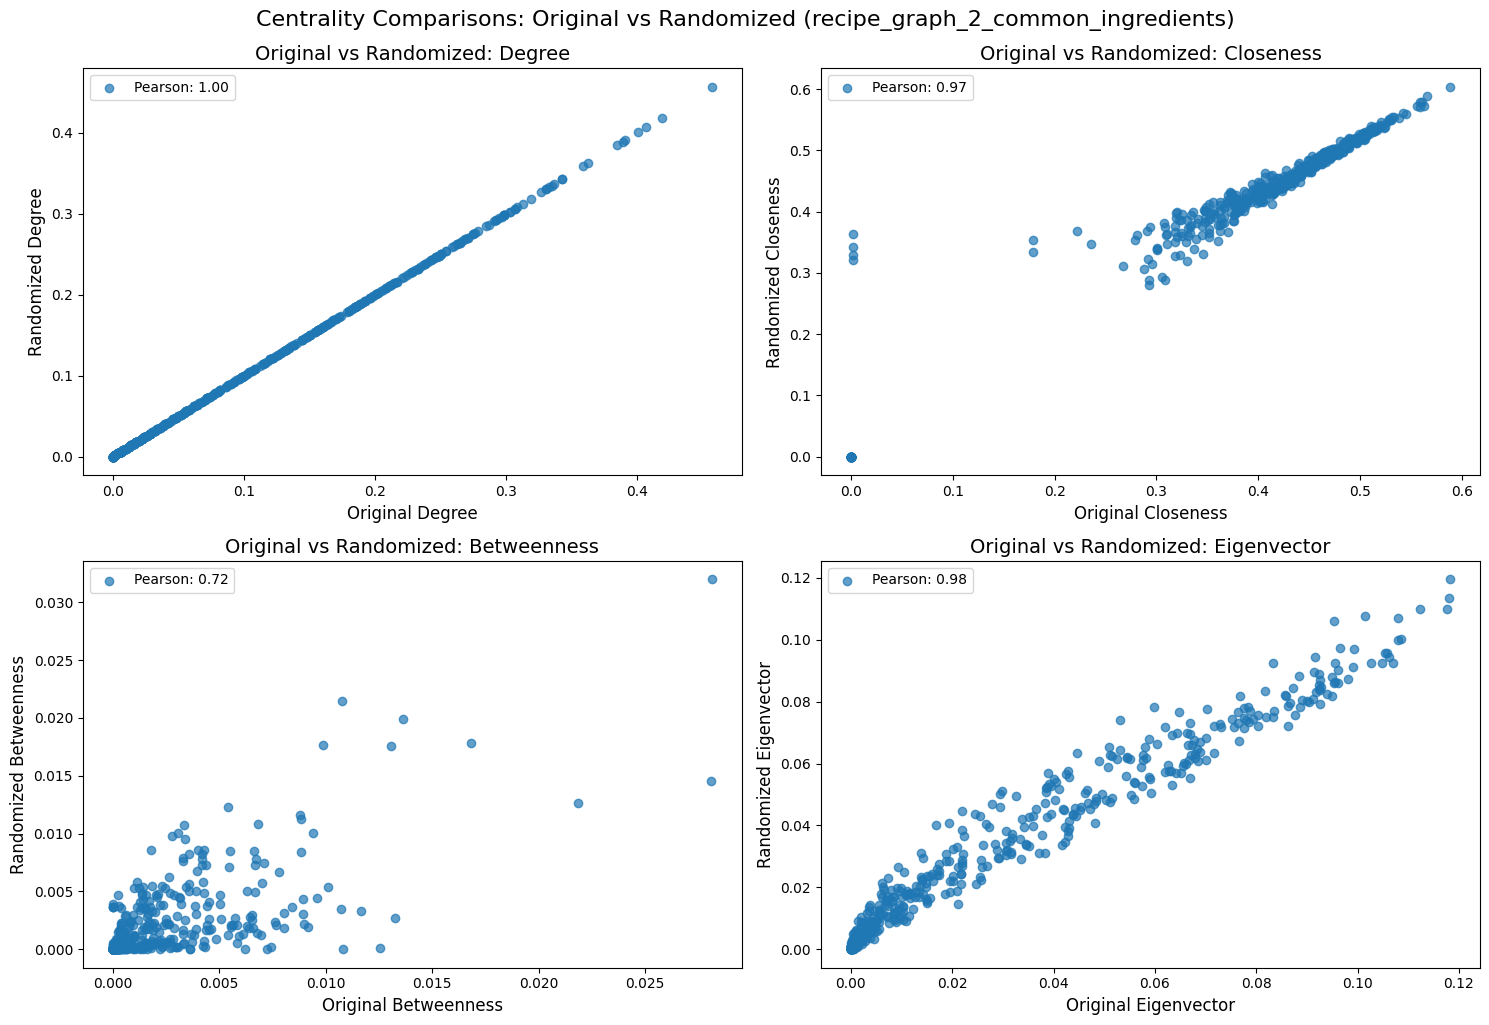

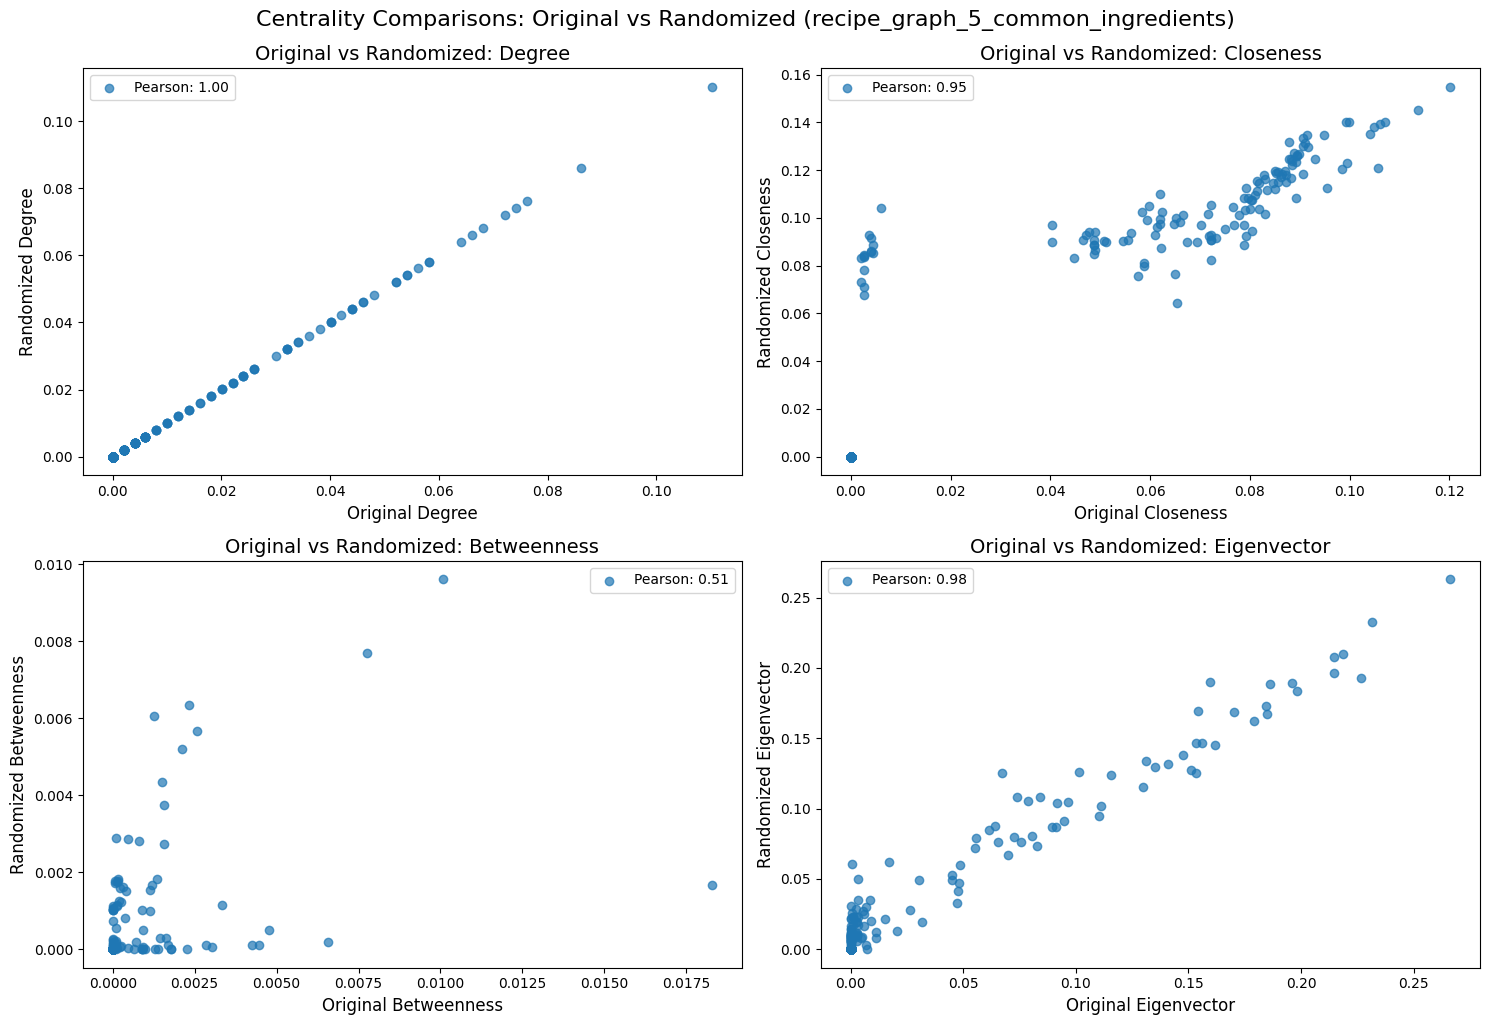

In [ ]:
from scipy.stats import pearsonr

def randomize_graph(graph):
    randomized_graph = nx.algorithms.smallworld.random_reference(graph, connectivity=False)
    return randomized_graph

def compute_pearson(df1, df2, col):
    return pearsonr(df1[col], df2[col])[0]

# This function plots the scatter plots for each centrality type, comparing the original and randomized graphs.
def plot_centrality_comparisons(df_original, df_randomized, graph_name):
    centrality_types = ['degree', 'closeness', 'betweenness', 'eigenvector']
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    for i, centrality in enumerate(centrality_types):
        pearson_corr = compute_pearson(df_original, df_randomized, centrality)
        
        # Scatter plot for original vs randomized
        axes[i].scatter(df_original[centrality], df_randomized[centrality], alpha=0.7, label=f'Pearson: {pearson_corr:.2f}')
        axes[i].set_title(f'Original vs Randomized: {centrality.capitalize()}', fontsize=14)
        axes[i].set_xlabel(f'Original {centrality.capitalize()}', fontsize=12)
        axes[i].set_ylabel(f'Randomized {centrality.capitalize()}', fontsize=12)
        axes[i].legend()
    
    plt.tight_layout()
    plt.suptitle(f'Centrality Comparisons: Original vs Randomized ({graph_name})', fontsize=16, y=1.02)
    plt.show()


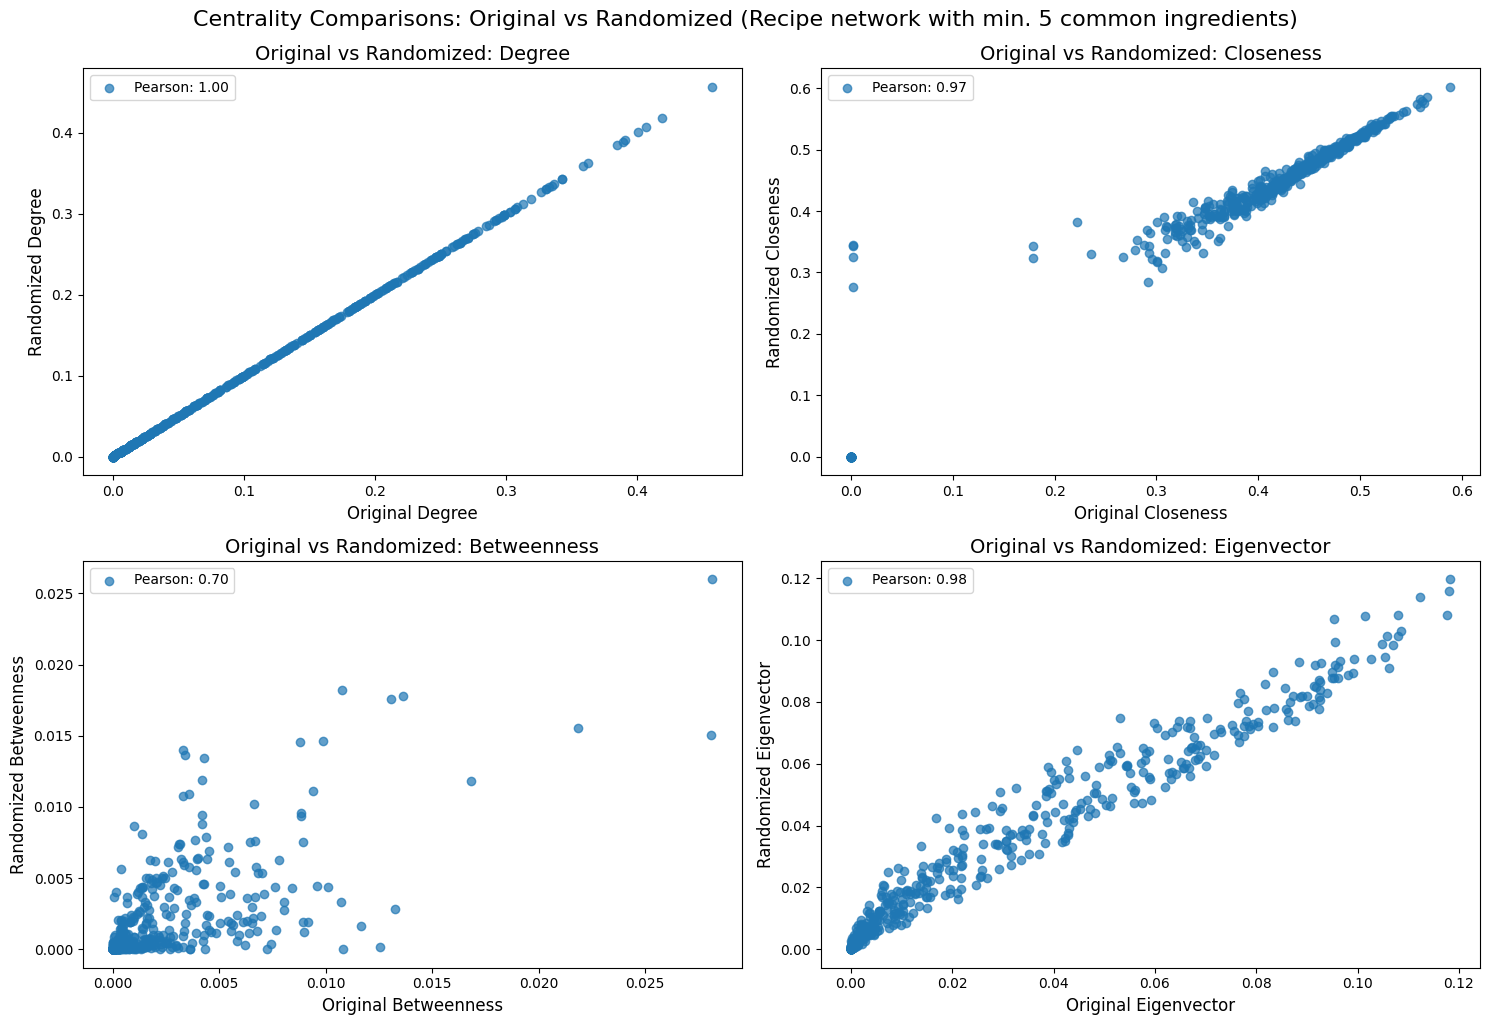

In [21]:
centralities = compute_centralities(recipes_2)
df = pd.DataFrame(centralities)
    
randomized_graph = randomize_graph(recipes_2)
randomized_centralities = compute_centralities(randomized_graph)
df_randomized = pd.DataFrame(randomized_centralities)
    
plot_centrality_comparisons(df, df_randomized, "Recipe network with min. 5 common ingredients")

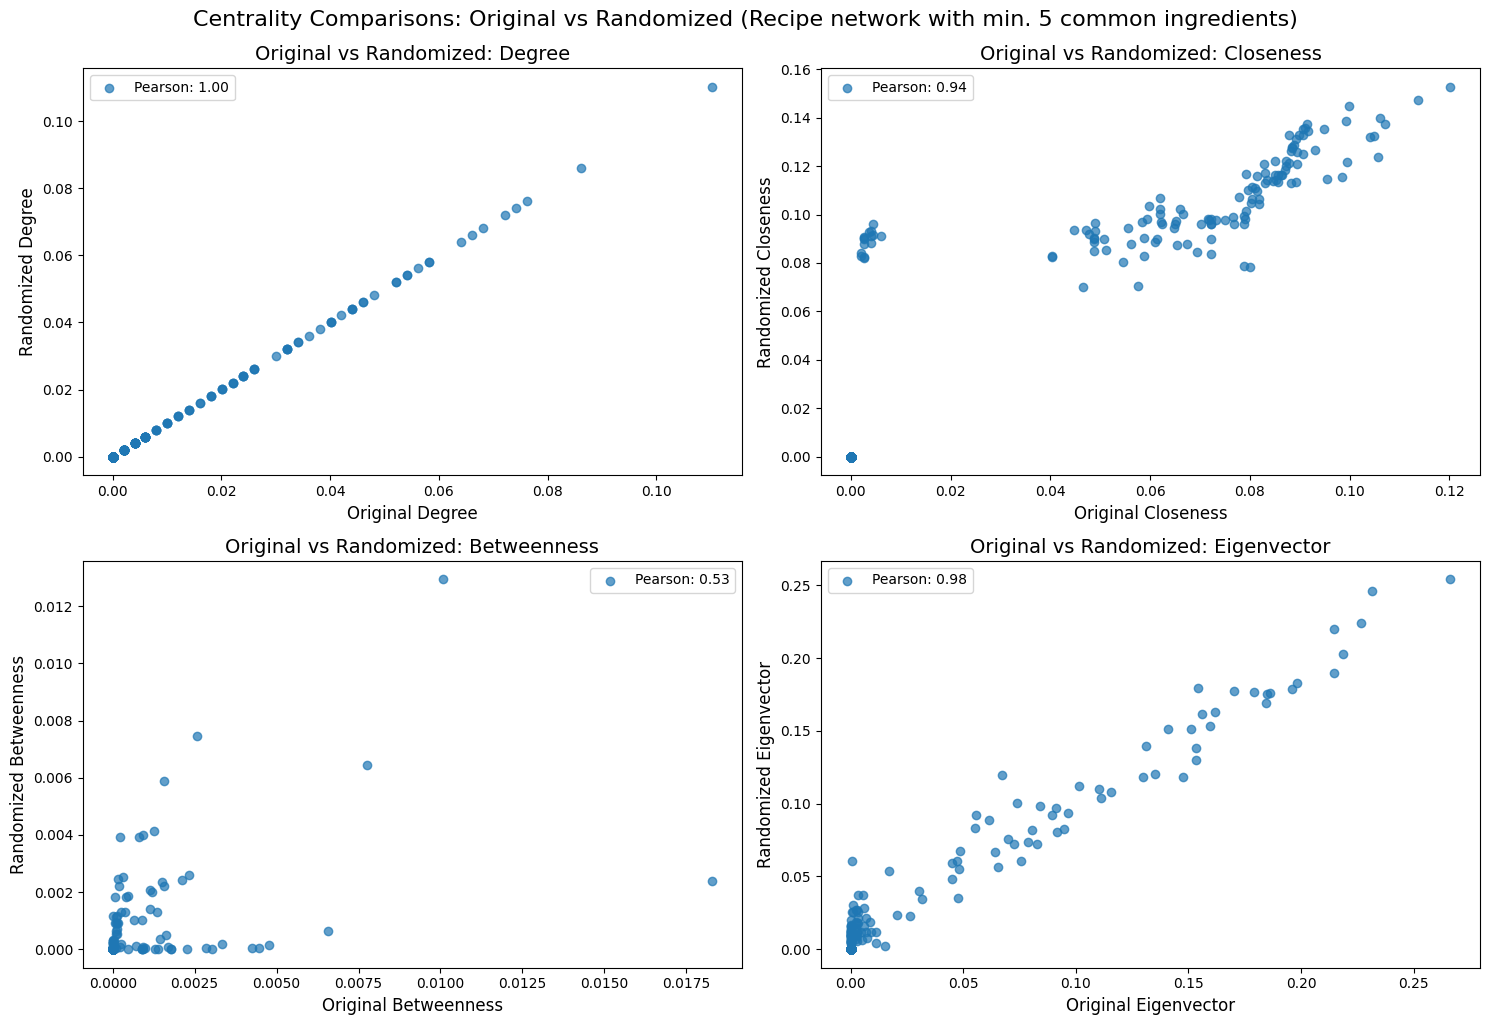

In [22]:
centralities = compute_centralities(recipes_5)
df = pd.DataFrame(centralities)
    
randomized_graph = randomize_graph(recipes_5)
randomized_centralities = compute_centralities(randomized_graph)
df_randomized = pd.DataFrame(randomized_centralities)
    
plot_centrality_comparisons(df, df_randomized, "Recipe network with min. 5 common ingredients")

### Observations

We can see on the plots that the Degree Centrality remains unchanged in the randomized graphs, because the degree distribution is preserved by the randomization. In case of Closeness and Betweenness Centrality we can see a lower correlation because randomization disrupts the shortest-path and flow structures. The Eigenvector Centrality also shows lower correlations but the difference is smaller, depending on how connected the nodes are in the random graph versus the original.

  
#### 1. Degree Centrality
Degree centrality measures the number of direct connections a node has within the network. A recipe with high degree centrality is one that shares a significant number of ingredients with many other recipes. These recipes likely use common ingredients and might represent versatile or foundational recipes that connect to many others.

During the randomization the edges are randomly rewired, but the node degrees remain unchanged, so the degree distribution remains the same, and therefore, the Degree Centrality remains unchanged, as the total number of connections for each node remained constant. Thats why it has 1.0 correlation.

#### 2. Closeness Centrality
Closeness centrality reflects how quickly a node can access other nodes in the network, measured by the average shortest path from that node to all others. A recipe with high closeness centrality can quickly "reach" or is closely connected to other recipes in the network. These recipes might be versatile in the sense that they use a set of ingredients that frequently appear in other recipes, making them central to the graph.

Closeness Centrality shows lower correlation because overall the shortest paths are disrupted because of the randomization.

#### 3. Betweenness Centrality
Betweenness centrality measures the extent to which a node serves as a bridge along the shortest paths between other nodes. Nodes with high betweenness centrality are critical for information flow or connectivity, acting as intermediaries. A recipe with high betweenness centrality acts as a "bridge" between clusters of recipes. These recipes likely share ingredients with multiple distinct groups of recipes and could play a crucial role in connecting different cuisines or cooking styles.

The Betweenness Centrality is also affected by the randomization because when the network is randomized shortest paths are removed or altered, and the nodes that served as intermediaries may no longer fulfill this role. This highlights the sensitivity of betweenness centrality to network structure. 

#### 4. Eigenvector Centrality
Eigenvector centrality evaluates a node's influence based not just on the number of connections but also on the quality and influence of its neighbors. A node connected to other well-connected nodes scores higher. A recipe with high eigenvector centrality is connected to other influential recipes. These recipes are central to the overall structure of the graph and might represent dishes with ingredients that are foundational to many popular or versatile recipes.

With the Eigenvector Centrality the correlation is affected less by the randomization,because it depends on how well the randomization maintains the overall connectivity and flow of importance across nodes. While randomization may disrupt connections, eigenvector centrality continues to reflect the influence of nodes based on their connections to other significant nodes.

#### Observed Differences and Similarities

Degree centrality remained stable in all cases, while closeness, betweenness, and eigenvector centralities were significantly affected by randomization, showcasing how the specific structure of the network influences the sensitivity of different centrality measures.


In [9]:
import powerlaw

from scipy.special import factorial
from scipy.stats import poisson, expon

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
import powerlaw

def plot_fit(G):
    degrees = [degree for _, degree in G.degree()]

    # Remove zero degrees to avoid issues with log scaling
    degrees = [d for d in degrees if d > 0]

    if len(degrees) == 0:
        print("No degrees greater than zero in the graph.")
        return

    fit = powerlaw.Fit(degrees, discrete=True)
    alpha = fit.alpha
    xmin = fit.xmin

    alpha_error = fit.sigma

    print(f"Alpha Error: {alpha_error}")
    print(f"Fitted alpha: {alpha}")

    lam = np.mean(degrees)

    # Safeguard against empty degrees
    hist, bin_edges = np.histogram(
        degrees,
        bins=np.logspace(np.log10(min(degrees)), np.log10(max(degrees)), num=40),
        density=True
    )
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    if np.any(np.isnan(hist)):
        print("Histogram contains NaN values. Check degree distribution.")
        return

    degree_values = np.arange(1, max(degrees) + 1)
    poisson_prob = (lam ** degree_values * np.exp(-lam)) / factorial(degree_values)
    exponential_prob = (1 / lam) * np.exp(-degree_values / lam)

    plt.figure(figsize=(7, 5))

    plt.loglog(bin_centers, hist, 'o', color='blue', markersize=5, label="Empirical Data")
    fit.power_law.plot_pdf(color='red', label=f"Power-Law Fit (α={alpha:.2f})")
    plt.loglog(degree_values, poisson_prob, 'g-', label=f'Poisson Fit (λ = {lam:.2f})')
    plt.loglog(degree_values, exponential_prob, 'm-', label=f'Exponential Fit (λ = {lam:.2f})')

    plt.xlabel("Degree (k)", fontsize=12)
    plt.ylabel("Probability (p(k))", fontsize=12)
    plt.title("Empirical Degree Distribution with Power-Law, Poisson, and Exponential Fits", fontsize=14)
    plt.legend()

    max_empirical_prob = np.nanmax(hist)  # Use nan-safe max function
    if max_empirical_prob > 0:
        plt.ylim(1e-6, max_empirical_prob * 1.1)
    else:
        print("Maximum empirical probability is zero or invalid.")
        return

    plt.show()


Calculating best minimal value for power law fit
Alpha Error: 0.569872420330063
Fitted alpha: 5.9022279203960375


C:\Users\vassa\AppData\Local\Temp\ipykernel_23012\347661397.py:40: RuntimeWarning: overflow encountered in power
  poisson_prob = (lam ** degree_values * np.exp(-lam)) / factorial(degree_values)
C:\Users\vassa\AppData\Local\Temp\ipykernel_23012\347661397.py:40: RuntimeWarning: invalid value encountered in divide
  poisson_prob = (lam ** degree_values * np.exp(-lam)) / factorial(degree_values)


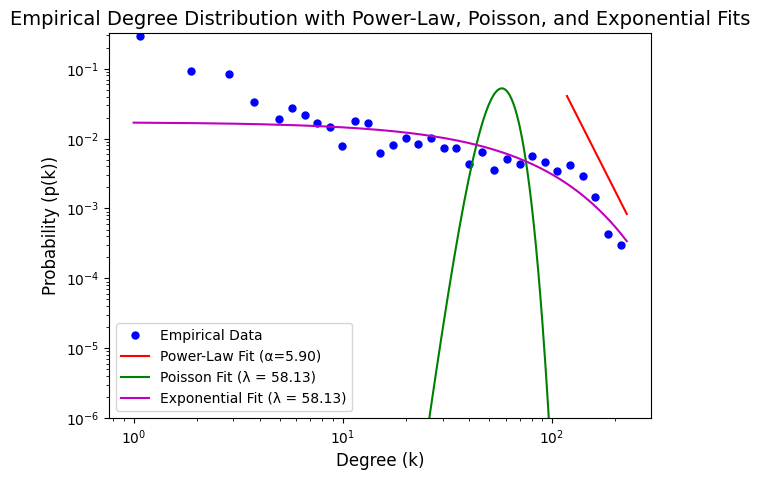

In [41]:
plot_fit(recipes_2)

Calculating best minimal value for power law fit
Alpha Error: 1.8992165573021944
Fitted alpha: 6.371795626440604


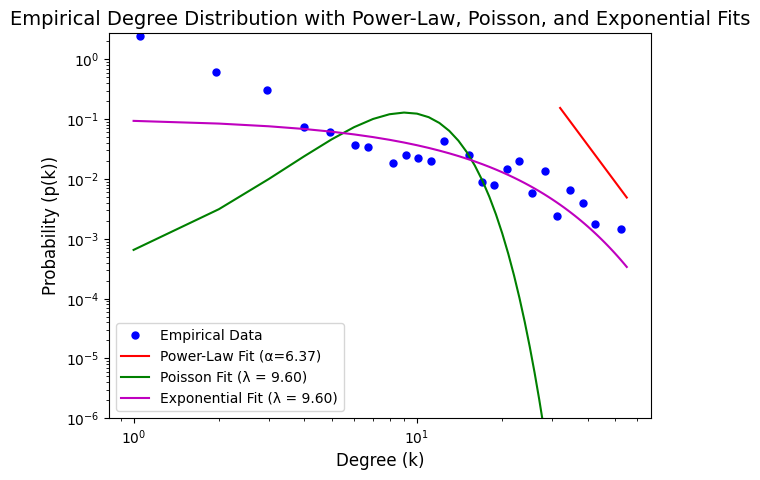

In [42]:
plot_fit(recipes_5)